In [1]:
import torch
import torchbearer

import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

In [2]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

In [19]:
# flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
#     transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

# create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

In [20]:
%matplotlib inline

# Plot ad-hoc data instances
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

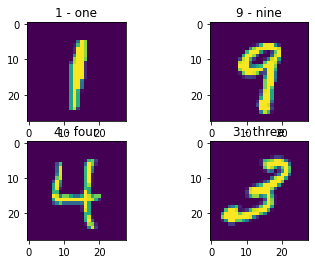

In [22]:
transform = transforms.Compose([
    transforms.Resize((240, 800)),
    transforms.ToTensor()
])

# generate the first batch
(batch_images, batch_labels) = trainloader.__iter__().__next__()

# plot 4 images
plt.subplot(221).set_title(trainset.classes[batch_labels[0]])
plt.imshow(batch_images[0].permute(1, 2, 0), aspect='equal')

plt.subplot(222).set_title(trainset.classes[batch_labels[1]])
plt.imshow(batch_images[1].permute(1, 2, 0), aspect='equal')

plt.subplot(223).set_title(trainset.classes[batch_labels[2]])
plt.imshow(batch_images[2].permute(1, 2, 0), aspect='equal')

plt.subplot(224).set_title(trainset.classes[batch_labels[3]])
plt.imshow(batch_images[3].permute(1, 2, 0), aspect='equal')

plt.show()

In [23]:
# flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

# create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

In [24]:
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out

In [25]:
import torchbearer
from torchbearer import Trial
from torch import optim
from torchbearer.callbacks import LiveLossPlot

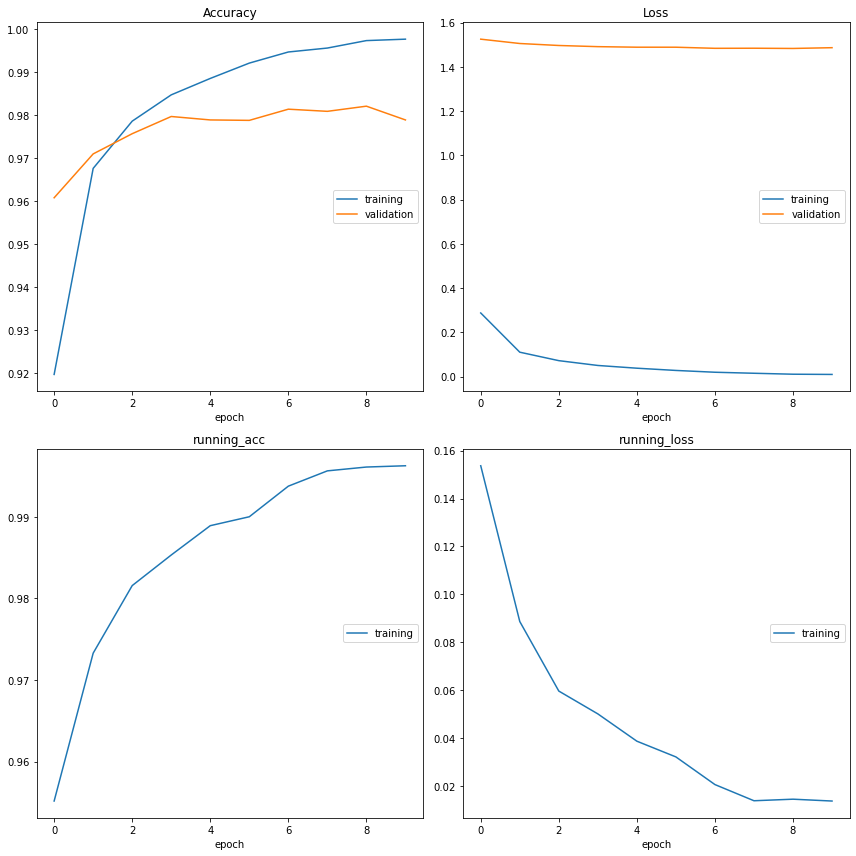

[{'running_loss': 0.15368539094924927,
  'running_acc': 0.9551562070846558,
  'loss': 0.2873051166534424,
  'acc': 0.9197166562080383,
  'val_loss': 1.5248689651489258,
  'val_acc': 0.9607999920845032,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.08861246705055237,
  'running_acc': 0.97328120470047,
  'loss': 0.11006429046392441,
  'acc': 0.9676333665847778,
  'val_loss': 1.5052683353424072,
  'val_acc': 0.9709999561309814,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.05956021323800087,
  'running_acc': 0.9815624952316284,
  'loss': 0.07180021703243256,
  'acc': 0.9786166548728943,
  'val_loss': 1.496274709701538,
  'val_acc': 0.9756999611854553,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.05002429708838463,
  'running_acc': 0.9853124618530273,
  'loss': 0.05007327347993851,
  'acc': 0.9847333431243896,
  'val_loss': 1.4910303354263306,
  'val_acc': 0.979699969291687,
  'train_steps': 469,
  'validation_steps': 79

In [27]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=784,
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

With 784 hidden units, the model seems to overfit as training accuracy is 99.6% but validation accuracy is 97.5%.

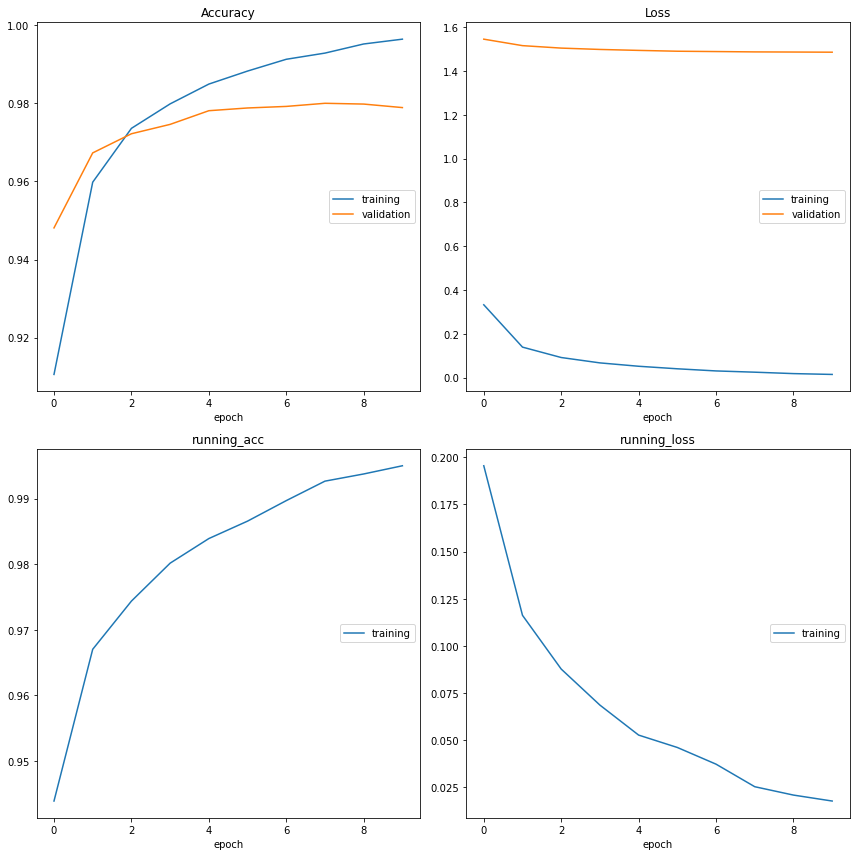

[{'running_loss': 0.195546492934227,
  'running_acc': 0.9439062476158142,
  'loss': 0.3327977657318115,
  'acc': 0.9105833172798157,
  'val_loss': 1.5453544855117798,
  'val_acc': 0.9480999708175659,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.11619064211845398,
  'running_acc': 0.9670312404632568,
  'loss': 0.1395331770181656,
  'acc': 0.9598000049591064,
  'val_loss': 1.5157886743545532,
  'val_acc': 0.9672999978065491,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.08767791837453842,
  'running_acc': 0.9743749499320984,
  'loss': 0.09207332134246826,
  'acc': 0.9735833406448364,
  'val_loss': 1.5045433044433594,
  'val_acc': 0.9721999764442444,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.06855664402246475,
  'running_acc': 0.9801562428474426,
  'loss': 0.06754379719495773,
  'acc': 0.9798499941825867,
  'val_loss': 1.4984210729599,
  'val_acc': 0.9745999574661255,
  'train_steps': 469,
  'validation_steps': 79},

In [28]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=392, # 784/2
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

A model with half the number of hidden units as input size stil overfits as training accuracy is 99.5% and validation accuracy is 97.9%

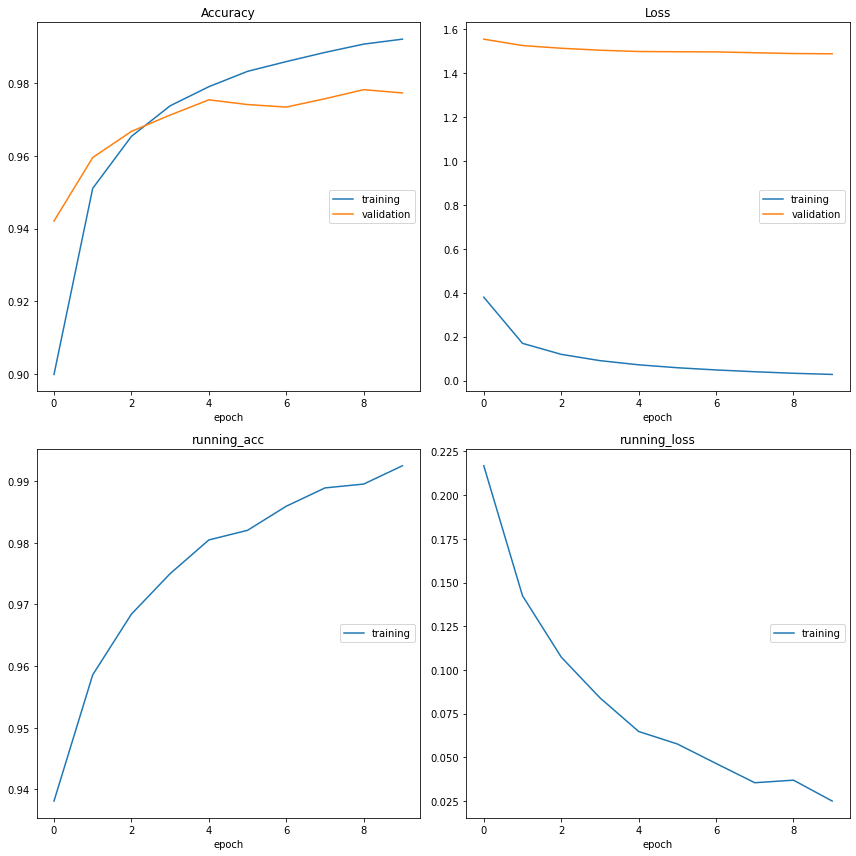

[{'running_loss': 0.2168114185333252,
  'running_acc': 0.93812495470047,
  'loss': 0.37976568937301636,
  'acc': 0.8998333215713501,
  'val_loss': 1.555527687072754,
  'val_acc': 0.9420999884605408,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.1424390822649002,
  'running_acc': 0.9585937261581421,
  'loss': 0.16947083175182343,
  'acc': 0.9510999917984009,
  'val_loss': 1.52646005153656,
  'val_acc': 0.9595999717712402,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.10734614729881287,
  'running_acc': 0.9684374928474426,
  'loss': 0.11936462670564651,
  'acc': 0.9654333591461182,
  'val_loss': 1.5140860080718994,
  'val_acc': 0.9667999744415283,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.08402395248413086,
  'running_acc': 0.9749999642372131,
  'loss': 0.0906471386551857,
  'acc': 0.9738500118255615,
  'val_loss': 1.5051742792129517,
  'val_acc': 0.971299946308136,
  'train_steps': 469,
  'validation_steps': 79},
 

In [29]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=196, # 784/4
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

Training accuracy is 99.3% and validation accuracy is 97.7%

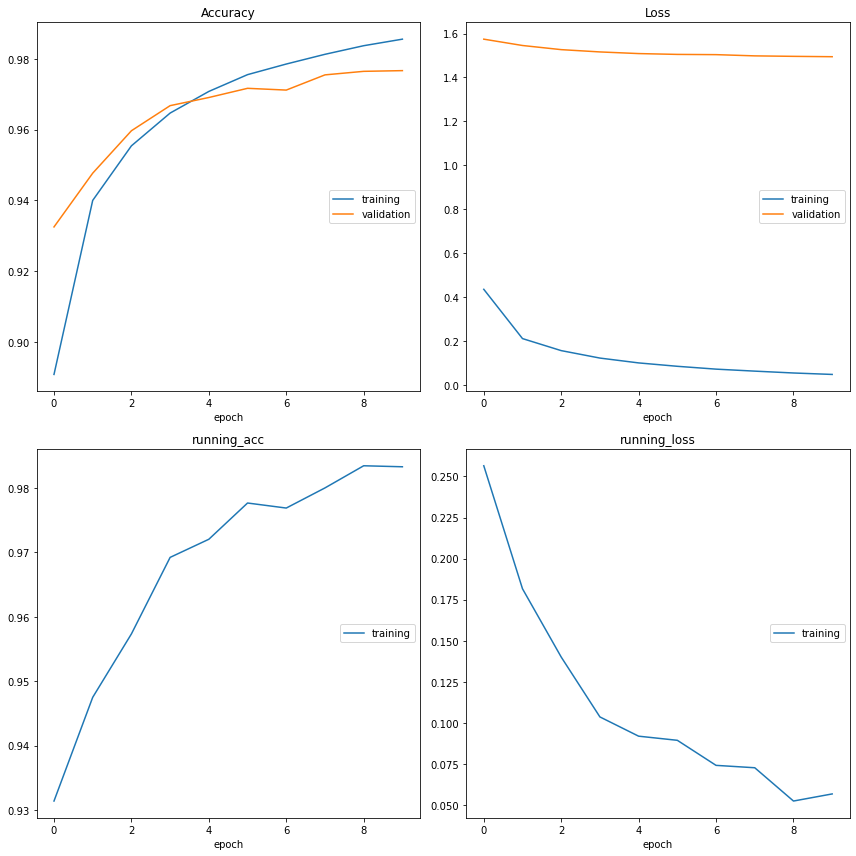

[{'running_loss': 0.2564983069896698,
  'running_acc': 0.9314061999320984,
  'loss': 0.43565070629119873,
  'acc': 0.8907833695411682,
  'val_loss': 1.5745230913162231,
  'val_acc': 0.9325000047683716,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.18164926767349243,
  'running_acc': 0.9474999904632568,
  'loss': 0.21129223704338074,
  'acc': 0.9399999976158142,
  'val_loss': 1.5456950664520264,
  'val_acc': 0.9476999640464783,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.14010122418403625,
  'running_acc': 0.9573437571525574,
  'loss': 0.15651775896549225,
  'acc': 0.9554333686828613,
  'val_loss': 1.526855230331421,
  'val_acc': 0.9596999883651733,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.10366471856832504,
  'running_acc': 0.9692187309265137,
  'loss': 0.12259244173765182,
  'acc': 0.9646999835968018,
  'val_loss': 1.5163884162902832,
  'val_acc': 0.9667999744415283,
  'train_steps': 469,
  'validation_steps':

In [30]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=98, # 784/8
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

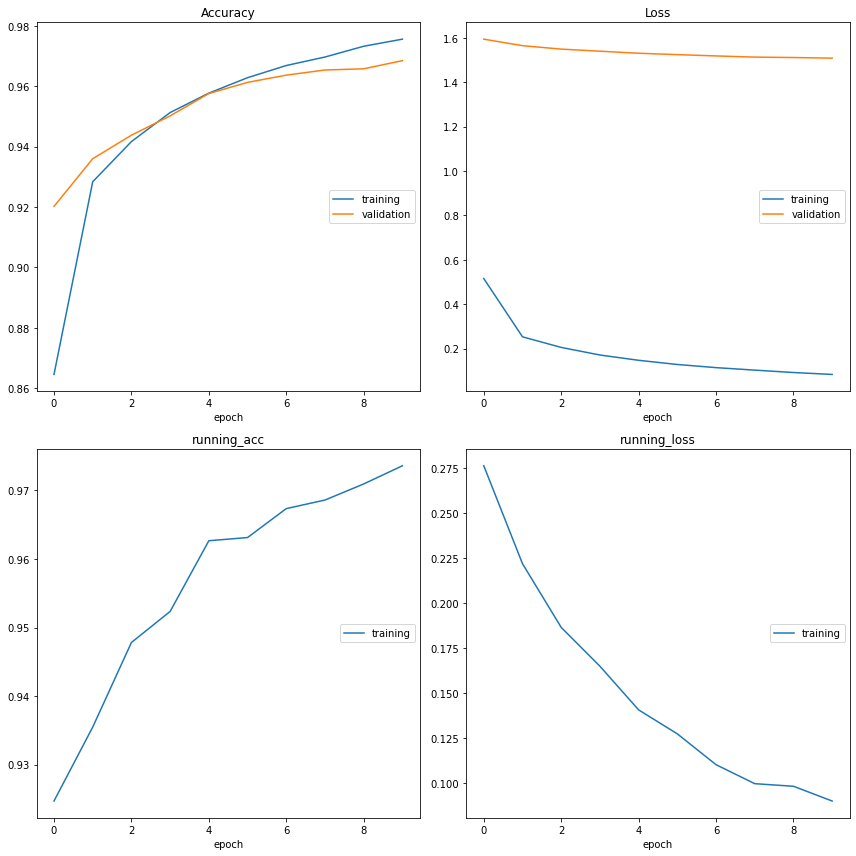

[{'running_loss': 0.2764735221862793,
  'running_acc': 0.9246875047683716,
  'loss': 0.515630841255188,
  'acc': 0.8645333647727966,
  'val_loss': 1.593615174293518,
  'val_acc': 0.920199990272522,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.22203277051448822,
  'running_acc': 0.9354687333106995,
  'loss': 0.2532080411911011,
  'acc': 0.9283666610717773,
  'val_loss': 1.564329981803894,
  'val_acc': 0.9359999895095825,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.18663333356380463,
  'running_acc': 0.9478124976158142,
  'loss': 0.20546358823776245,
  'acc': 0.9416833519935608,
  'val_loss': 1.548818826675415,
  'val_acc': 0.9437999725341797,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.16506963968276978,
  'running_acc': 0.9523437023162842,
  'loss': 0.17132189869880676,
  'acc': 0.9513000249862671,
  'val_loss': 1.539393424987793,
  'val_acc': 0.9501999616622925,
  'train_steps': 469,
  'validation_steps': 79},
 

In [31]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=49, # 784/16
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

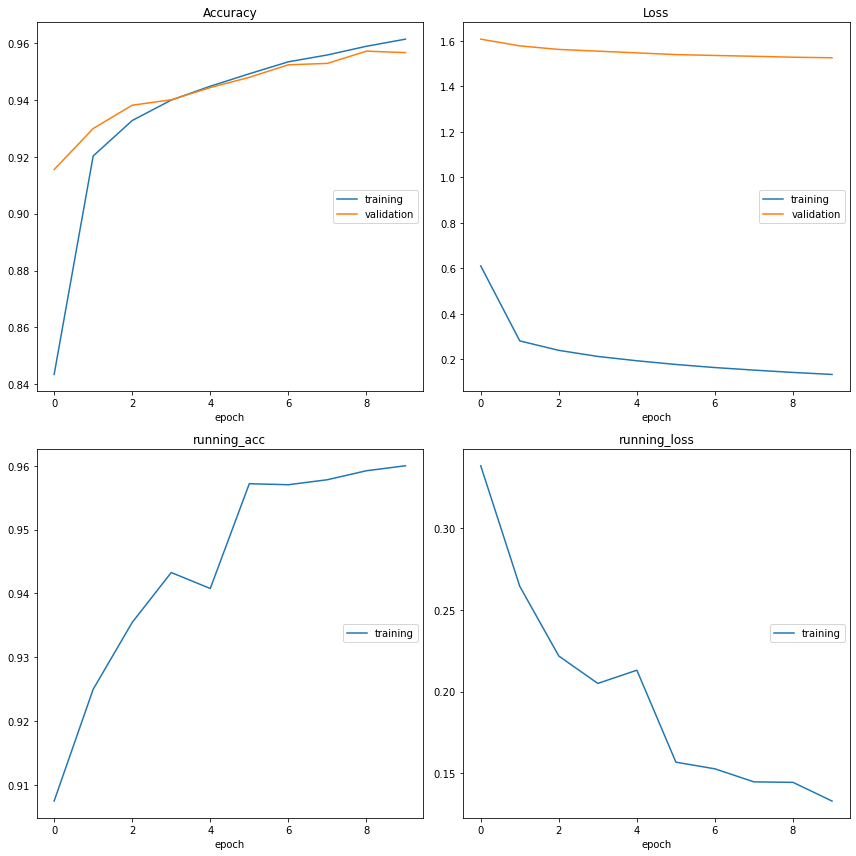

[{'running_loss': 0.3379215598106384,
  'running_acc': 0.9074999690055847,
  'loss': 0.6109534502029419,
  'acc': 0.8434666991233826,
  'val_loss': 1.608093023300171,
  'val_acc': 0.9154999852180481,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.26428598165512085,
  'running_acc': 0.9249999523162842,
  'loss': 0.28121092915534973,
  'acc': 0.9202499985694885,
  'val_loss': 1.5785181522369385,
  'val_acc': 0.9298999905586243,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.2217177003622055,
  'running_acc': 0.9354687333106995,
  'loss': 0.23968476057052612,
  'acc': 0.9327166676521301,
  'val_loss': 1.5629311800003052,
  'val_acc': 0.9380999803543091,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.2049909234046936,
  'running_acc': 0.9432812333106995,
  'loss': 0.2129025012254715,
  'acc': 0.9398999810218811,
  'val_loss': 1.5553297996520996,
  'val_acc': 0.9399999976158142,
  'train_steps': 469,
  'validation_steps': 79}

In [32]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=25, # ~784/32
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

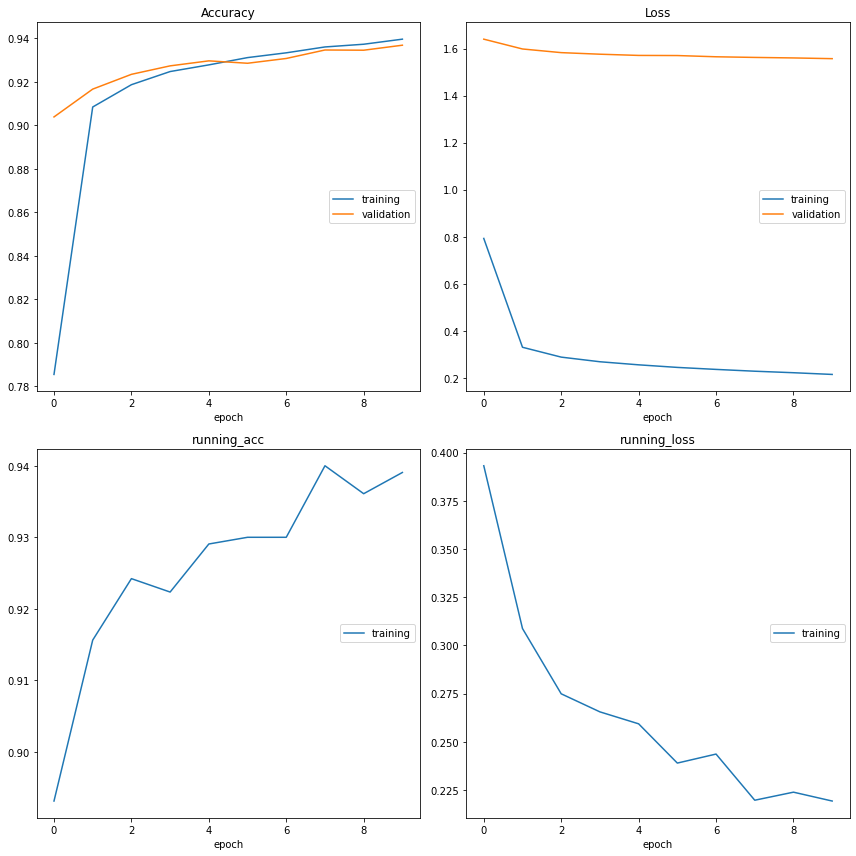

[{'running_loss': 0.3931351900100708,
  'running_acc': 0.8931249976158142,
  'loss': 0.7927584648132324,
  'acc': 0.7854166626930237,
  'val_loss': 1.6399003267288208,
  'val_acc': 0.9038999676704407,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.3087649345397949,
  'running_acc': 0.9156249761581421,
  'loss': 0.33007264137268066,
  'acc': 0.9084666967391968,
  'val_loss': 1.5981649160385132,
  'val_acc': 0.916700005531311,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.27493247389793396,
  'running_acc': 0.9242187142372131,
  'loss': 0.2881954610347748,
  'acc': 0.9187333583831787,
  'val_loss': 1.582647681236267,
  'val_acc': 0.9235000014305115,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.26557105779647827,
  'running_acc': 0.9223437309265137,
  'loss': 0.26852139830589294,
  'acc': 0.9247833490371704,
  'val_loss': 1.5759397745132446,
  'val_acc': 0.9273999929428101,
  'train_steps': 469,
  'validation_steps': 79}

In [33]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=12, # ~784/64
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

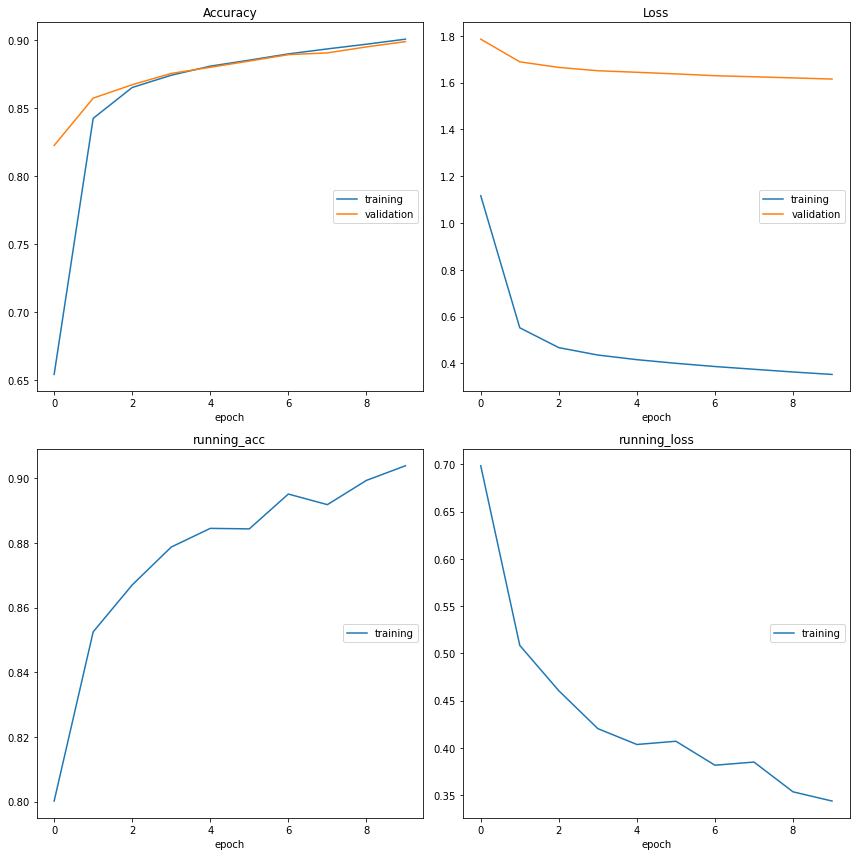

[{'running_loss': 0.6985384225845337,
  'running_acc': 0.8001562356948853,
  'loss': 1.1166480779647827,
  'acc': 0.6542166471481323,
  'val_loss': 1.7858997583389282,
  'val_acc': 0.8226000070571899,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.5084951519966125,
  'running_acc': 0.8524999618530273,
  'loss': 0.5517776608467102,
  'acc': 0.8425666689872742,
  'val_loss': 1.688966989517212,
  'val_acc': 0.8574000000953674,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.4605174958705902,
  'running_acc': 0.8670312166213989,
  'loss': 0.4669108986854553,
  'acc': 0.8652499914169312,
  'val_loss': 1.665066123008728,
  'val_acc': 0.8672999739646912,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.4204550087451935,
  'running_acc': 0.8787499666213989,
  'loss': 0.43525344133377075,
  'acc': 0.8742666840553284,
  'val_loss': 1.6509042978286743,
  'val_acc': 0.8755999803543091,
  'train_steps': 469,
  'validation_steps': 79},
 

In [34]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=6, # ~784/128
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

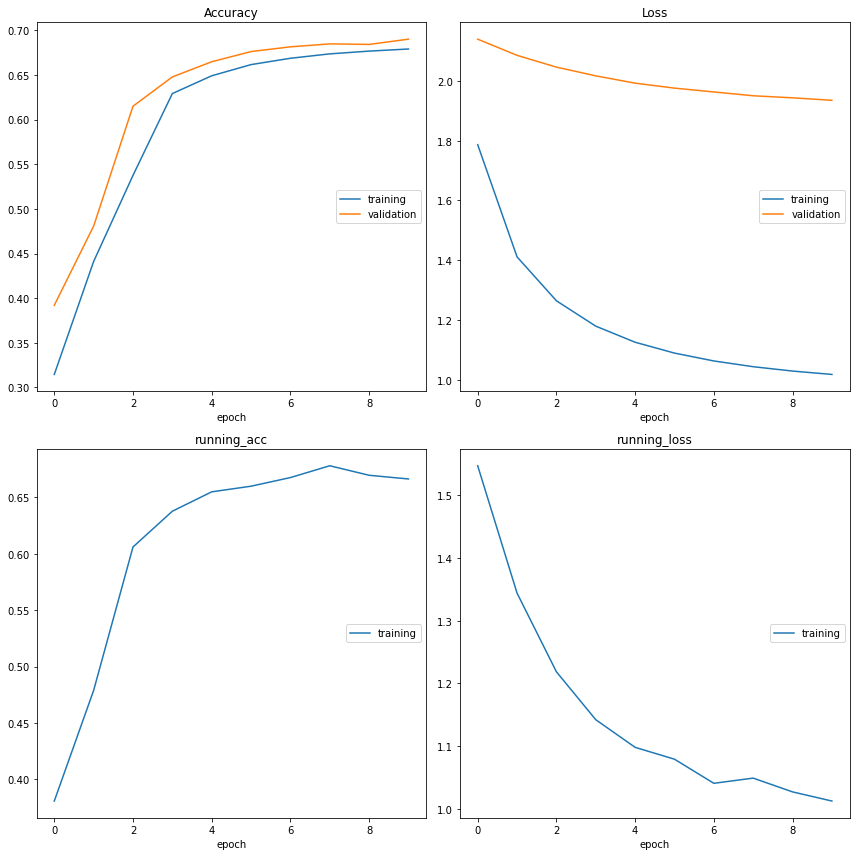

[{'running_loss': 1.5473829507827759,
  'running_acc': 0.38078123331069946,
  'loss': 1.7867004871368408,
  'acc': 0.3145333230495453,
  'val_loss': 2.1398465633392334,
  'val_acc': 0.3919999897480011,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 1.3441888093948364,
  'running_acc': 0.4789062440395355,
  'loss': 1.411217451095581,
  'acc': 0.4410833418369293,
  'val_loss': 2.085679531097412,
  'val_acc': 0.48069998621940613,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 1.218658447265625,
  'running_acc': 0.6060937643051147,
  'loss': 1.264217734336853,
  'acc': 0.5375166535377502,
  'val_loss': 2.0462872982025146,
  'val_acc': 0.6150000095367432,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 1.1421793699264526,
  'running_acc': 0.6378124952316284,
  'loss': 1.17935311794281,
  'acc': 0.6291666626930237,
  'val_loss': 2.017062187194824,
  'val_acc': 0.6477999687194824,
  'train_steps': 469,
  'validation_steps': 79},
 {'ru

In [35]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=3, # ~784/256
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

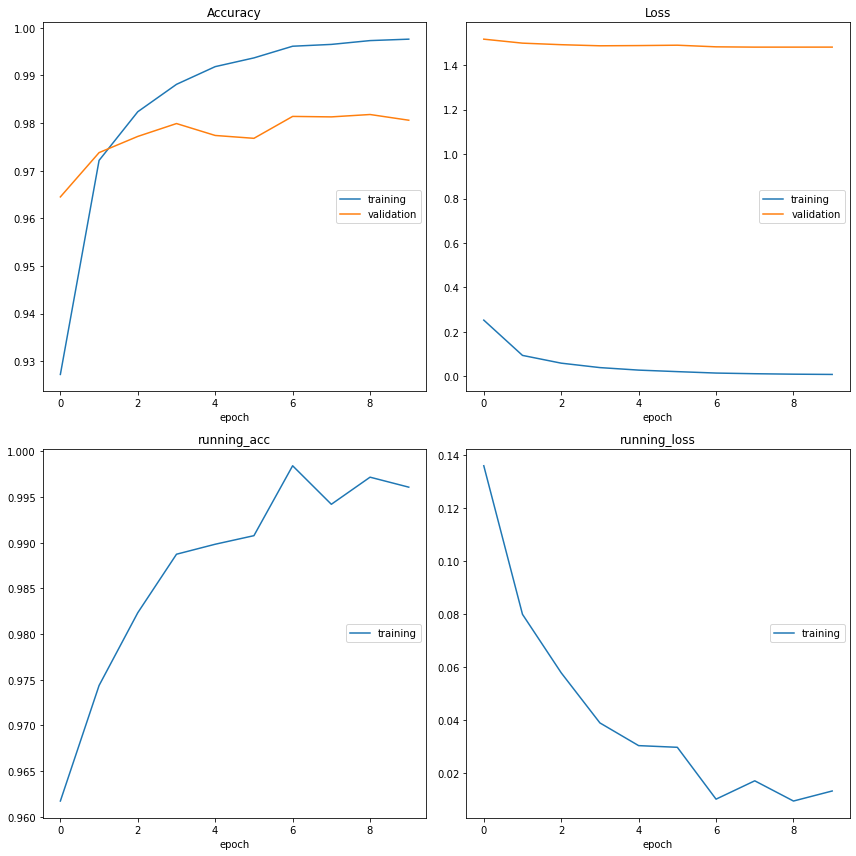

[{'running_loss': 0.13590677082538605,
  'running_acc': 0.961718738079071,
  'loss': 0.2525334358215332,
  'acc': 0.9272333383560181,
  'val_loss': 1.5174745321273804,
  'val_acc': 0.9644999504089355,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.07980024069547653,
  'running_acc': 0.9743749499320984,
  'loss': 0.09366251528263092,
  'acc': 0.9721666574478149,
  'val_loss': 1.499545931816101,
  'val_acc': 0.973800003528595,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.057729825377464294,
  'running_acc': 0.9823437333106995,
  'loss': 0.05875059589743614,
  'acc': 0.9823833703994751,
  'val_loss': 1.4925761222839355,
  'val_acc': 0.9771999716758728,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.038806892931461334,
  'running_acc': 0.9887499809265137,
  'loss': 0.03876173868775368,
  'acc': 0.9881333708763123,
  'val_loss': 1.4876312017440796,
  'val_acc': 0.9799000024795532,
  'train_steps': 469,
  'validation_steps':

In [36]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=784*2, # 784*2
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10)

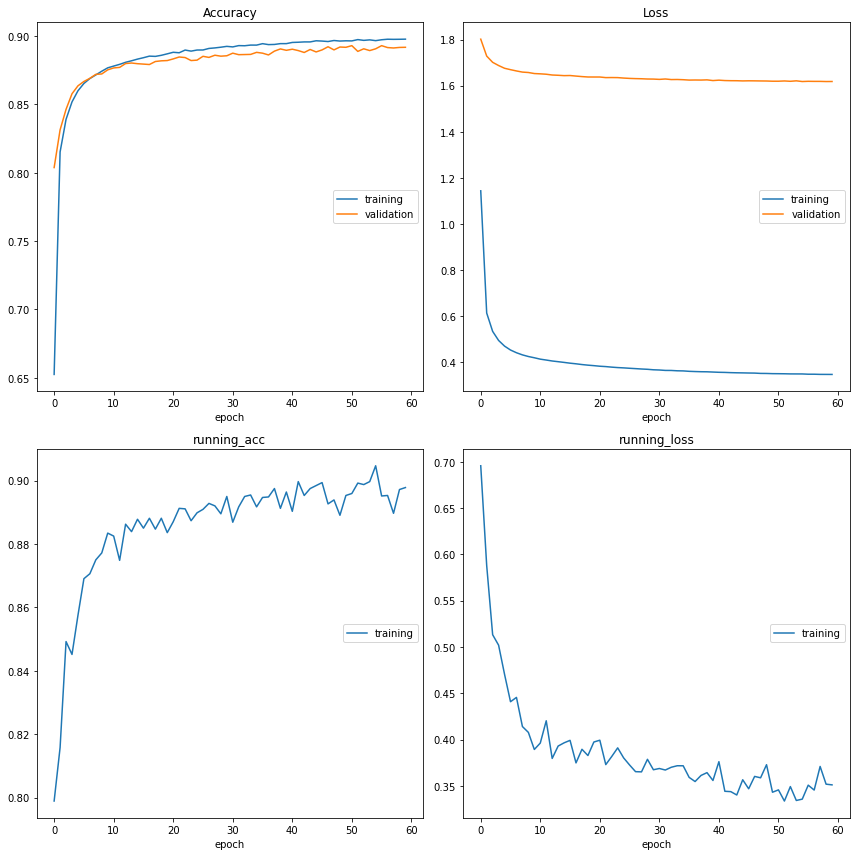

[{'running_loss': 0.6956525444984436,
  'running_acc': 0.7989062070846558,
  'loss': 1.1440213918685913,
  'acc': 0.6524333357810974,
  'val_loss': 1.8018383979797363,
  'val_acc': 0.8037999868392944,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.5879119634628296,
  'running_acc': 0.8157812356948853,
  'loss': 0.6138246655464172,
  'acc': 0.8152333498001099,
  'val_loss': 1.7284125089645386,
  'val_acc': 0.8313999772071838,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.5131869912147522,
  'running_acc': 0.8492187261581421,
  'loss': 0.5343425273895264,
  'acc': 0.8390833139419556,
  'val_loss': 1.7013880014419556,
  'val_acc': 0.8463999629020691,
  'train_steps': 469,
  'validation_steps': 79},
 {'running_loss': 0.5018811225891113,
  'running_acc': 0.8451562523841858,
  'loss': 0.4949241280555725,
  'acc': 0.8518333435058594,
  'val_loss': 1.6874445676803589,
  'val_acc': 0.8578000068664551,
  'train_steps': 469,
  'validation_steps': 79},


In [38]:
# note 28x28 flattened image corresponds to vector of length 784
model = BaselineModel(input_size=784, hidden_size=6, # ~784/128
                      num_classes=10)

loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trial = Trial(model, optimiser, loss_function,
              metrics=['loss', 'accuracy'],
              callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, 
                      val_generator=testloader)
trial.run(epochs=10*6) # 10*6